# Final exam from "Introduction to Machine Learning" - Romario Stanković 2020230210

### 0) Setup

In [406]:
import numpy as np
import matplotlib.pyplot as plt

In [407]:
# Computes the square of a vector
def square(V : np.ndarray):
    return V ** 2

In [408]:
# Computes the average of a vector
def avg(V : np.ndarray):
    return sum(V) / len(V)

In [409]:
# Transposes a matrix
def transpose(M : np.ndarray):
    r = len(M)
    c = len(M[0])

    N = []

    for j in range(c):
        C = []
        for i in range(r):
            val = M[i][j]
            C.append(val)
        N.append(C)

    return np.array(N)

In [410]:
# Computes the dot product of a matrix and a vector
def dot(M : np.ndarray, V : np.ndarray):

    r = M.shape[0]
    c = M.shape[1]

    D = []

    for i in range(r):
        value = 0.0
        for j in range(c):
            value = value + M[i][j] * V[j]
        D.append(value)

    return np.array(D)

In [411]:
# Computes the standard deviation of a vector
def std(V : np.ndarray):
    n = len(V)
    mean = avg(V)

    variation = 0.0
    for i in range(n):
        variation = variation + (V[i] - mean) ** 2

    std = (variation / n) ** 0.5

    return std

In [412]:
# Normalizes a matrix
def normalize(x : np.ndarray):

    n = x.shape[1]

    for i in range(n):

        m = avg(x[:, i])
        s = std(x[:, i])

        x[:, i] = (x[:, i] - m) / s

    return x

In [413]:
# Splits the data into training and testing sets
def train_test_split(x : np.ndarray, y : np.ndarray, test_size = 0.2):

    m = x.shape[0]

    index = np.arange(m)
    np.random.shuffle(index)

    size = int(m * test_size)

    x_train = x[index[size:]]
    y_train = y[index[size:]]
    x_test = x[index[:size]]
    y_test = y[index[:size]]

    return (x_train, x_test, y_train, y_test)

In [414]:
# Encodes the labels (from strings to integers)
def encode_labels(y : np.ndarray):
    dict = {}
    index = 0

    result = []

    for i in range(len(y)):
        if y[i] not in dict:
            dict[y[i]] = index
            index = index + 1
        result.append(dict[y[i]])

    return np.array(result)

### 1) Linear Regression

In [415]:
class LinearRegression:

    # Initialize LinearRegression
    def __init__(self, learning_rate : float = 0.01, iterations : int = 100, batch_size : int = 16):
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost = []
        self.coef = None

    # Get the next batch of features and targets
    def get_next_batch(self, x : np.ndarray, y : np.ndarray):

        # Get number of samples
        m = x.shape[0]

        # Store the batch size in a local variable
        size = self.batch_size

        # Take (size) features and targets 
        for i in range(0, m, size):
            # Yield the result, stopping the function at this points until the next call
            yield ( x[i : i + size], y[i : i + size] )

    # Calculates the cost of the hypothesis
    def calculate_cost(self, hypothesis : np.ndarray, target : np.ndarray):
        # Get the number of samples
        s = hypothesis.shape[0]
        # Return the cost of linear regression
        return (1 / s) * 0.5 * sum(square(hypothesis - target))

    # Performs the backwards propagation
    def backwards_propagation(self, x : np.ndarray, y : np.ndarray, h : np.ndarray, theta : np.ndarray, no_samples : int):

        # Get number of theta variables
        n = theta.shape[0]

        # Update the bias
        theta[0] = theta[0] - (self.learning_rate * 2 / no_samples) * sum(h - y)

        # Update the coefficients
        for i in range(1, n):
            theta[i] = theta[i] - (self.learning_rate * 2 / no_samples) * sum((h - y) * transpose(x)[i])

        return theta

    # Calculates the hypothesis
    def hypothesis(self, x : np.ndarray, theta : np.ndarray):

        # Get the number of samples
        m = x.shape[0]
        n = x.shape[1]

        # initialize the hypothesis
        H = np.ones((m, 1))

        # Reshape theta to be a matrix with 1 row and n columns
        theta = theta.reshape(1, n)

        # Go through the samples and calculate the hypothesis
        for i in range(m):
            H[i] = dot(theta, x[i])

        # Return the hypothesis
        return H.reshape(m)

    # Fit the model
    def fit(self, x : np.ndarray, y : np.ndarray):

        # Get the number of features (n) and samples (m)
        no_samples = x.shape[0]
        no_features = x.shape[1]

        # Initialize the bias
        bias = np.ones((no_samples, 1))
        theta = np.random.randn(no_features+1) * 0.001

        x = np.concatenate((bias, x), axis = 1)

        for _ in range(self.iterations):
            
            loss = []
            for _, (x_batch, y_batch) in enumerate(self.get_next_batch(x, y)):
                # Make a hypothesis
                h = self.hypothesis(x_batch, theta)

                # Add loss for each batch
                cost = self.calculate_cost(h, y_batch)
                loss.append(cost)

                theta = self.backwards_propagation(x_batch, y_batch, h, theta, no_samples)

            # Save the cost of this iteration
            self.cost.append(avg(loss))

        self.coef = theta
    
        return self

    # Predict the target
    def predict(self, x : np.ndarray):

        # Get the number of samples
        m = x.shape[0]

        # Initialize the bias
        bias = np.ones((m, 1))

        # Concatenate the bias with the input data
        x = np.concatenate((bias, x), axis = 1)

        # Make a hypothesis
        h = self.hypothesis(x, self.coef)

        return h

In [416]:
# Load the data
csv = np.loadtxt('wine-quality.csv', delimiter=',', dtype=str)
columns = csv[0,:]
data = csv[1:, :]

# Select all except the pH column as the features
X = data[:, np.arange(data.shape[1]) != 8].astype(float)
# Select the pH column as the target
Y = data[:, 8].astype(float)

X = normalize(X)

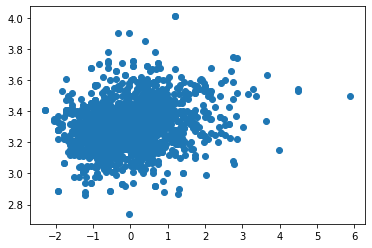

In [417]:
plt.scatter(X[:, 1], Y)

In [418]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 0.2)

In [419]:
model = LinearRegression(iterations=200)

model.fit(X, Y)

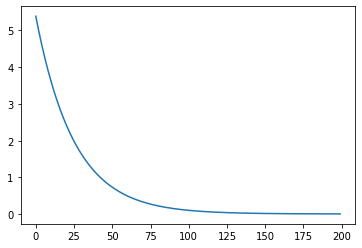

In [420]:
cost = model.cost

plt.plot(cost)

In [421]:
y_pred = model.predict(x_test)

mse = sum(square(y_pred - y_test)) / len(y_test)

print(mse)

0.013579808286273415


### 2) Logistic Regression

In [422]:
class LogisticRegression:

    def __init__(self, learning_rate : float = 0.001, regularization_param : float = 2, iterations : int = 100, batch_size : int = 10):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.batch_size = batch_size
        self.regularization_param = regularization_param
        self.cost = []
        self.coef = None

    def next_batch(self, x : np.ndarray, y : np.ndarray):
            # Get the number of samples
            m = x.shape[0]
    
            # Store the batch size in a local variable
            size = self.batch_size
    
            # Take (size) features and targets 
            for i in range(0, m, size):
                # Yield the result, stopping the function at this points until the next call
                yield ( x[i : i + size], y[i : i + size] )

    def sigmoid(self, z : np.ndarray):
        # Return the sigmoid of z
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h : np.ndarray, y : np.ndarray):
        e = 1e-10
        # Calculate the cost function
        return -avg(y * np.log(h + e) + (1 - y) * np.log(1 - h + e))

    def fit(self, x : np.ndarray, y : np.ndarray):

        n = x.shape[1]
        m = x.shape[0]

        bias = np.ones((m, 1))
        x = np.concatenate((bias, x), axis = 1)
        W = np.random.randn(n+1)

        for _ in range(self.iterations):

            loss = []

            for _, (x_batch, y_batch) in enumerate(self.next_batch(x, y)):

                bm = x_batch.shape[0]

                z = dot(x_batch, W)
                h = self.sigmoid(z)

                ridge = (self.regularization_param / (2 * bm)) * sum(square(W))
                cost = self.cost_function(h, y_batch) + ridge
                loss.append(cost)

                error = h - y_batch
                gradient = (1 / bm) * (dot(transpose(x_batch), error) + (self.regularization_param / bm) * W)

                W = W - self.learning_rate * gradient

            self.cost.append(avg(loss))

        self.coef = W

        return self

    def predict(self, x : np.ndarray, threshold : float = 0.5):

        labels = []

        W = self.coef[1:]
        b = self.coef[0]

        y_pred = dot(x, W) + b
        activation = self.sigmoid(y_pred)

        for i in activation:
            if i > threshold:
                labels.append(1)
            else:
                labels.append(0)
        
        labels = np.array(labels)
        return labels

In [423]:
csv = np.loadtxt('breast-cancer.csv', delimiter=',', dtype=str)
columns = csv[0,:]
data = csv[1:, :]

X = data[:, 1:].astype(float)
Y = data[:, 0]

X = normalize(X)

Y = encode_labels(Y)

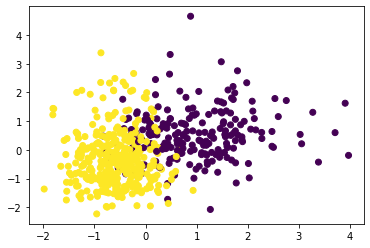

In [424]:
plt.scatter(X[:, 2], X[:, 1], c=Y)

In [425]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 0.2)

In [426]:
model = LogisticRegression(iterations=100, learning_rate=0.01, regularization_param=0.1)

model.fit(x_train, y_train)

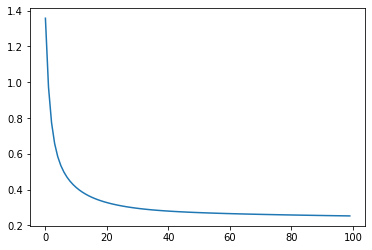

In [427]:
cost = model.cost

plt.plot(cost)

In [428]:
y_pred = model.predict(x_test)

print((y_pred == y_test).sum() / len(y_test))

0.9646017699115044


### 3) Neural Networks

### 4) K-Means